In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from models import RecurrentAE

In [147]:
test_data = np.load("../data/clean/test_sequence.npy")

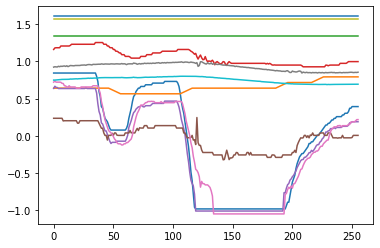

In [4]:
plt.plot(test_data[0])

In [12]:
seq_len = 256
n_features = 11
hidden_dim = 128

save_dir = f"../checkpoints/seq/001/checkpoint.pt"

net = RecurrentAE(n_features=n_features, seq_len=seq_len, hidden_dim=hidden_dim)
net.load_state_dict(torch.load(save_dir, map_location="cpu"))
net.eval()
net.requires_grad_(False)

RecurrentAE(
  (encoder): RecurrentEncoder(
    (rnn1): LSTM(11, 128, batch_first=True)
    (rnn2): LSTM(128, 128, batch_first=True)
    (tanh): Tanh()
  )
  (decoder): RecurrentDecoder(
    (rnn1): LSTM(128, 128, batch_first=True)
    (rnn2): LSTM(128, 128, batch_first=True)
    (tanh): Tanh()
    (output_layer): Linear(in_features=128, out_features=11, bias=True)
  )
)

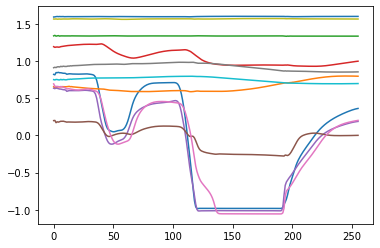

In [13]:
plt.plot(net(torch.from_numpy(test_data[0]).unsqueeze(0))[0].detach().numpy())

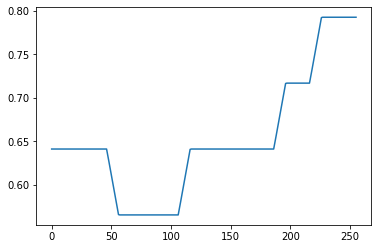

In [49]:
plt.plot(test_data[0][:,1]) #Air Intake Temeprature

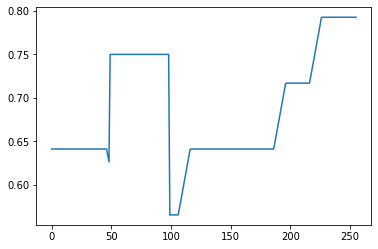

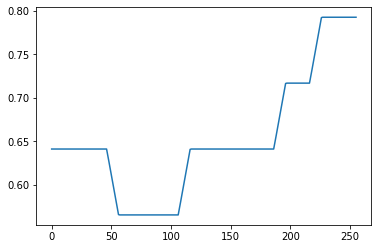

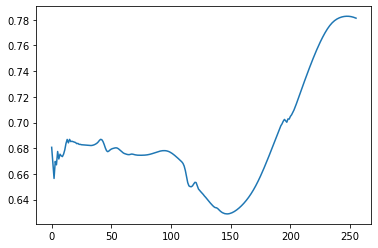

0.03946 t=0 
0.02776 t=1 
0.01525 t=2 
0.02848 t=3 
0.02584 t=4 
0.03621 t=5 
0.03038 t=6 
0.03411 t=7 
0.03287 t=8 
0.03226 t=9 
0.03421 t=10 
0.03751 t=11 
0.04246 t=12 
0.04560 t=13 
0.04295 t=14 
0.04564 t=15 
0.04394 t=16 
0.04417 t=17 
0.04386 t=18 
0.04352 t=19 
0.04319 t=20 
0.04233 t=21 
0.04250 t=22 
0.04177 t=23 
0.04175 t=24 
0.04148 t=25 
0.04140 t=26 
0.04132 t=27 
0.04123 t=28 
0.04115 t=29 
0.04104 t=30 
0.04092 t=31 
0.04087 t=32 
0.04086 t=33 
0.04098 t=34 
0.04123 t=35 
0.04160 t=36 
0.04210 t=37 
0.04273 t=38 
0.04364 t=39 
0.04484 t=40 
0.04568 t=41 
0.04540 t=42 
0.04400 t=43 
0.04165 t=44 
0.03890 t=45 
0.03678 t=46 
0.04327 t=47 
0.05138 t=48 
0.07127 t=49 
0.07065 t=50 ANOMALY HERE
0.07026 t=51 ANOMALY HERE
0.06999 t=52 ANOMALY HERE
0.06976 t=53 ANOMALY HERE
0.06967 t=54 ANOMALY HERE
0.06990 t=55 ANOMALY HERE
0.07047 t=56 ANOMALY HERE
0.07129 t=57 ANOMALY HERE
0.07220 t=58 ANOMALY HERE
0.07302 t=59 ANOMALY HERE
0.07366 t=60 ANOMALY HERE
0.07414 t=61 ANOMALY HER

In [161]:
anomaly_case = test_data[0].copy()
original = test_data[0].copy()

anomaly_case[49:49+50, 1] = 0.75


plt.plot(anomaly_case[:,1]) #Synthetically Air Intake Temeprature anomaly
plt.show()

plt.plot(original[:,1])
plt.show()

reconstruction = net(torch.from_numpy(anomaly_case).unsqueeze(0))[0].detach().numpy()

plt.plot(reconstruction[:, 1])
plt.show()

loss = abs(reconstruction - anomaly_case)

for i in range(len(loss)):
    print_string = f"{loss[i][1] :.5f} t={i} {'ANOMALY HERE' if 49 < i < 49+50 else ''}"
    print(print_string)

In [91]:
non_anomalous_case = test_data[100]

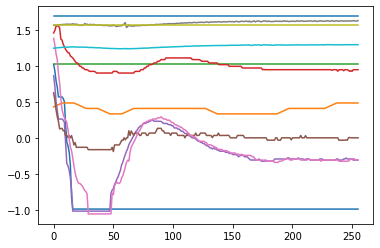

In [93]:
plt.plot(non_anomalous_case)

In [94]:
reconstruction = net(torch.from_numpy(non_anomalous_case).unsqueeze(0))[0].detach().numpy()

In [119]:
abs(reconstruction.reshape(256, -1) - non_anomalous_case.reshape(256, -1)).sum()

39.49388

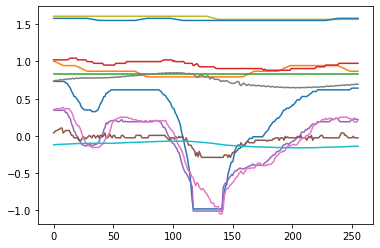

51.16034


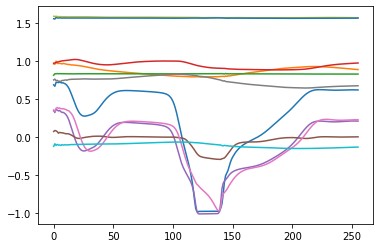

In [126]:
non_anomalous_case = test_data[1000]
plt.plot(non_anomalous_case)
plt.show()
reconstruction = net(torch.from_numpy(non_anomalous_case).unsqueeze(0))[0].detach().numpy()
print(abs(reconstruction.reshape(-1) - non_anomalous_case.reshape(-1)).sum())
plt.plot(reconstruction)
plt.show()

In [127]:
loss = abs(reconstruction - non_anomalous_case)

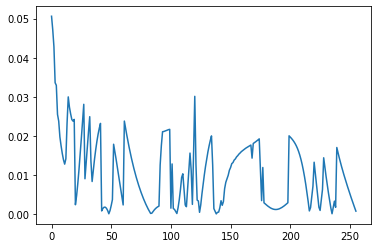

In [144]:
plt.plot(loss[:, 3])